In [1]:
import pandas as pd
from pingouin import ttest
import plotly.express as pxa

## About the Data:

This file contains data regarding the 1969 and 1970 Vietnam War Draft lottery. 

As the story goes, in order to give everyone a fair chance of being selected for the war, the birthdays of young men born between 1944-1950 were put into capsules, then into a jar, from which the dates were drawn. In total, there were 366 capsules (one for every day of the year). The first number drawn, say March 1st, would get assigned #1. The second number drawn would be assigned #2, and so on...

The men with numbers up to and including #195 were drafted into the war. Some people noticed, however, that men with birthdays late in the year (i.e. June - December) we more likely to be selected (in other words, drew lower numbers) than men with birthdays earlier in the year. 

Below, we analyze the data and show that for the 1969 draft lottery, there is a clear trend towards drawing lower numbers for birthdays between June and December. We show that this pattern is highly unlikely to have been a product of pure chance and that other mechanisms were likely at play to cause such a skewed result.

### Import dataset:

In [2]:
draft_df = pd.read_excel("DraftData.xlsx", sheet_name='data', header=4)

### Drop empty columns:

In [3]:
draft_df.dropna(how='all', axis=1, inplace=True)

In [4]:
draft_df = draft_df.iloc[:,:5]

### Cast date to datetime object, convert months to month name, and rename colums:

In [40]:
draft_df['DATE'] = pd.to_datetime(draft_df['DATE'])
draft_df['Month Name'] = pd.to_datetime(draft_df['Month'], format='%m').dt.month_name()

# set months as catwgorical dtype tp allow sorting and filtering:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
draft_df['Month Name'] = pd.Categorical(draft_df['Month Name'], categories=months, ordered=True)
draft_df.rename(columns={'N69':'1969 drawing', 'N70':'1970 drawing'}, inplace=True)
draft_df

,DATE,Month,Day,1969 drawing,1970 drawing,Month Name
0,1948-01-01,1,1,305,133,January
1,1948-01-02,1,2,159,195,January
2,1948-01-03,1,3,251,336,January
3,1948-01-04,1,4,215,99,January
4,1948-01-05,1,5,101,33,January
...,...,...,...,...,...,...
361,1948-12-27,12,27,78,239,December
362,1948-12-28,12,28,123,128,December
363,1948-12-29,12,29,16,145,December
364,1948-12-30,12,30,3,192,December


### Split dataframes into first and second half of the year:

In [41]:
early_df = draft_df[draft_df['Month Name'] <= 'June']

In [42]:
late_df = draft_df[draft_df['Month Name'] > 'June']

### Capture the monthly means for the drawing (each year):

In [44]:
means = draft_df.groupby('Month Name')[['1969 drawing', '1970 drawing']].mean().reset_index().sort_values('Month Name')
means

,Month Name,1969 drawing,1970 drawing
0,January,201.161290,151.838710
1,February,202.965517,192.034483
2,March,225.806452,179.774194
3,April,203.666667,182.166667
4,May,207.967742,183.516129
5,June,195.733333,194.566667
6,July,181.548387,183.580645
7,August,173.451613,194.354839
8,September,157.300000,209.866667
9,October,182.451613,172.967742


### Plot means over time and compare between the 1969 and 1970 draft:

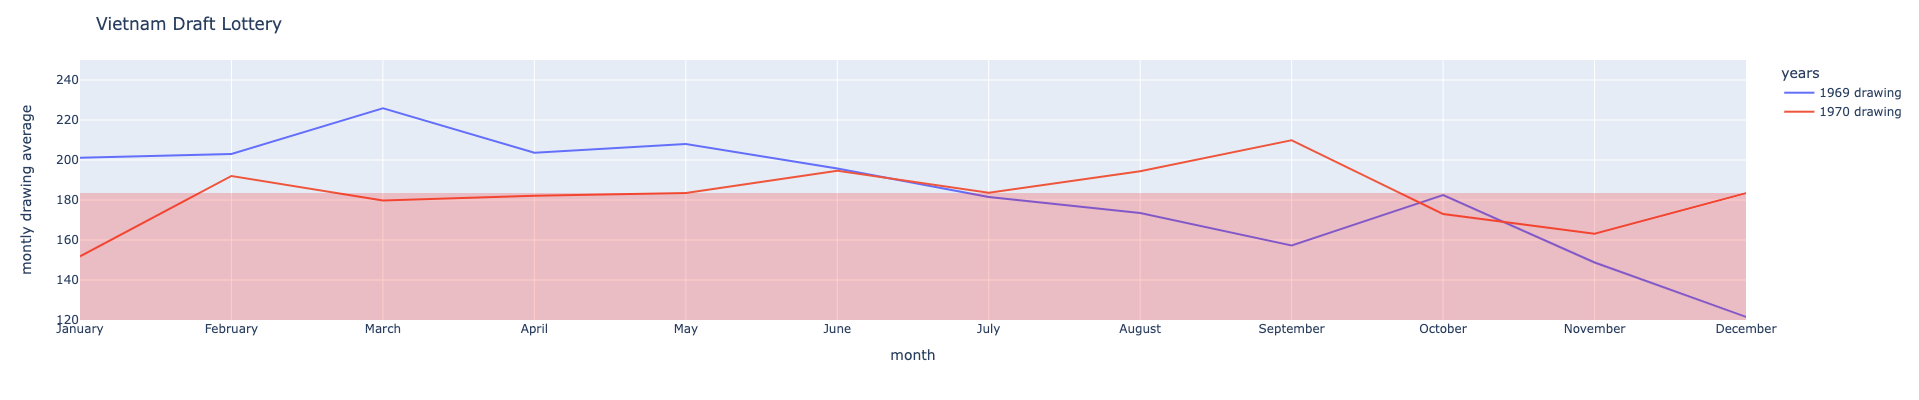

In [48]:
fig = px.line(means, x='Month Name', y=['1969 drawing', '1970 drawing'])
fig.add_hrect(y0=0, y1=183.5, line_width=0, fillcolor="red", opacity=0.2)
fig.update_yaxes(range=[120, 250])
fig.update_layout(
    title="Vietnam Draft Lottery",
    xaxis_title="month",
    yaxis_title="montly drawing average",
    legend_title="years",
    width=1200,
    height=400,
)

### Perform two-tailed T-tests in order to ascertain statistical significance between first and second half of the year:

In [46]:
ttest(early_df['1969 drawing'], late_df['1969 drawing'], paired=False, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.195871,362.561839,two-sided,0.000034,"[24.12, 66.68]",0.438775,472.382,0.986993


In [47]:
ttest(early_df['1970 drawing'], late_df['1970 drawing'], paired=False, alternative='two-sided')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.370227,363.200297,two-sided,0.711429,"[-25.87, 17.67]",0.038692,0.123,0.065751
